In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Voter Registration Data
Downloaded from https://www.sos.la.gov/ElectionsAndVoting/Pages/RegistrationStatisticsParish.aspx

The columns are in this order:

--REGISTERED VOTERS--       --DEMOCRATS--               --REPUBLICANS--             --OTHER PARTIES--

TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER  TOTAL  WHITE  BLACK  OTHER

In [2]:
def count_voters(precincts, df, column):
    voter_count = []
    for p in precincts:
        # PARISH 36 - WARD 8 - PRECINCT #
        if type(p[1]) == int:
            precinct_name = "PAR 36 W {:02d} P {:02d}".format(p[0], p[1])
        elif type(p[1]) == str:
            precinct_name = "PAR 36 W {:02d} P {}".format(p[0], p[1])
        precinct_row = df[ df['precinct-name'].str.match(precinct_name)]
        row_index = precinct_row.index.values.astype(int)[0]
        row_total = df.at[row_index, column]
        if type(row_total) == str and ',' in row_total:
            row_total = row_total.replace(',', '')
        # try:
        # except AttributeError as e:
        #     print(p)
        #     print(row_index, column)
        #     print(precinct_row)
        #     raise e

        row_total = int(row_total)
        voter_count.append( row_total )
    return sum(voter_count)

WARNING *** file size (3211200) not 512 + multiple of sector size (512)
                  East Bank  West Bank 
Total voters         14753    33443
White voters          8689     8490
Black voters          4524    22157
Other race voters     1540     2796
Democratic voters     9194    21595
Republican voters     1100     3567


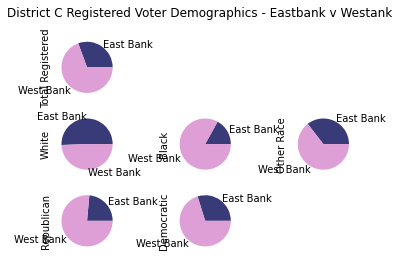

In [4]:
df = pd.read_excel(
    "2020_0601_par_comb.xls",
    sheet_name="Sheet36",
    skiprows=116
)
df.columns = [
    "precinct-name",
    "empty-space",
    "registered-total",
    "registered-white",
    "registered-black",
    "registered-other",
    "dem-total",
    "dem-white",
    "dem-black",
    "dem-other",
    "rep-total",
    "rep-white",
    "rep-black",
    "rep-other",
    "other-total",
    "other-white",
    "other-black",
    "other-other"
]

eastbank_precincts = [
    # WARD, PRECINCT
    (4, 2),
    (5, 1), (5, 2), (5, 3),
    (6, 1), (6, 2), (6, 4),
    (7, 1), (7, 2), (7, 4), (7, 5), (7, 6),
    (8, 1), (8, 2), (8, 4), (8, 6),
    (9, 9), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 19),
]

westbank_precincts = [
    # WARD, PRECINCT
    (15, 1), (15, 2), (15, 3), (15, 5), (15, 6), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, '12A'),
    (15, 13), (15, '13A'), (15, '13B'),
    (15, 14), (15, '14A'), (15, '14B'), (15, '14C'), (15, '14D'), (15, '14E'), (15, '14F'), (15, '14G'),
    (15, 15), (15, '15A'), (15, '15B'),
    (15, 16),
    (15, 17), (15, '17A'), (15, '17B'),
    (15, 18), (15, '18A'), (15, '18B'), (15, '18C'), (15, '18D'), (15, '18E'), (15, '18F'),
    (15, 19), (15, '19A'), (15, '19B'), (15, '19C'),
]

eastbank_total_voter_count = count_voters(eastbank_precincts, df, 'registered-total')
westbank_total_voter_count = count_voters(westbank_precincts, df, 'registered-total')
eastbank_white_voter_count = count_voters(eastbank_precincts, df, 'registered-white')
westbank_white_voter_count = count_voters(westbank_precincts, df, 'registered-white')
eastbank_black_voter_count = count_voters(eastbank_precincts, df, 'registered-black')
westbank_black_voter_count = count_voters(westbank_precincts, df, 'registered-black')
eastbank_other_voter_count = count_voters(eastbank_precincts, df, 'registered-other')
westbank_other_voter_count = count_voters(westbank_precincts, df, 'registered-other')

eastbank_dem_voter_count = count_voters(eastbank_precincts, df, 'dem-total')
westbank_dem_voter_count = count_voters(westbank_precincts, df, 'dem-total')
eastbank_rep_voter_count = count_voters(eastbank_precincts, df, 'rep-total')
westbank_rep_voter_count = count_voters(westbank_precincts, df, 'rep-total')

print("{:17s} {:10s} {:10s}".format("", "East Bank", "West Bank"))
print("{:17s} {:>8d} {:>8d}".format("Total voters", eastbank_total_voter_count, westbank_total_voter_count))
print("{:17s} {:>8d} {:>8d}".format("White voters", eastbank_white_voter_count, westbank_white_voter_count))
print("{:17s} {:>8d} {:>8d}".format("Black voters", eastbank_black_voter_count, westbank_black_voter_count))
print("{:17s} {:>8d} {:>8d}".format("Other race voters", eastbank_other_voter_count, westbank_other_voter_count))
print("{:17s} {:>8d} {:>8d}".format("Democratic voters", eastbank_dem_voter_count, westbank_dem_voter_count))
print("{:17s} {:>8d} {:>8d}".format("Republican voters", eastbank_rep_voter_count, westbank_rep_voter_count))


df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
    'radius': [2439.7, 6051.8, 6378.1]},
    index=['Mercury', 'Venus', 'Earth'])


df = pd.DataFrame(
    {
        "Total Registered": [eastbank_total_voter_count, westbank_total_voter_count],
        "White": [eastbank_white_voter_count, westbank_white_voter_count],
        "Black": [eastbank_black_voter_count, westbank_black_voter_count],
        "Other Race": [eastbank_other_voter_count, westbank_other_voter_count],
        "Democratic": [eastbank_dem_voter_count, westbank_dem_voter_count],
        "Republican": [eastbank_rep_voter_count, westbank_rep_voter_count]
    },
    index=['East Bank', 'West Bank']
)

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle('District C Registered Voter Demographics - Eastbank v Westank') 

# fig.set_figheight(6)
# fig.set_figwidth(8)

df["Total Registered"].plot.pie(ax=axes[0, 0], colormap="tab20b")
axes[0, 1].axis('off')
axes[0, 2].axis('off')

df["White"].plot.pie(ax=axes[1, 0], colormap="tab20b")
df["Black"].plot.pie(ax=axes[1, 1], colormap="tab20b")
df["Other Race"].plot.pie(ax=axes[1, 2], colormap="tab20b")

df["Republican"].plot.pie(ax=axes[2, 0], colormap="tab20b")
df["Democratic"].plot.pie(ax=axes[2, 1], colormap="tab20b")
axes[2, 2].axis('off')

# fig.tight_layout()

# plot = df.plot.pie(subplots=True, colormap="tab20b")
plt.show()